In [425]:
import numpy as np
from math import e, sqrt, pi
from PIL import Image
from decimal import Decimal
from matplotlib import pyplot as plt

test = np.zeros((200,10))
testres = np.zeros(200 , dtype=int)

X = np.ones((2400,784))

Xi = np.ones((200,784))

for i in range(0,2400) :
    img2d = np.array(Image.open("Train/"+str(i+1) + '.jpg'))
    img1d = img2d.ravel()
    X[i,:] = img1d

for i in range(0,200) :
    img2d = np.array(Image.open("Test/"+str(i+1) + '.jpg'))
    img1d = img2d.ravel()
    Test_X[i,:] = img1d
    
X = X / 255
Xi = Test_X /255

T = np.loadtxt("Train/Training Labels.txt", dtype=int)
Ti = np.loadtxt("Test/Test Labels.txt" , dtype=int)





In [411]:
def mean(X):
    return sum(X)/float(len(X))
 

In [412]:
def stdev(X):
    mu = mean(X)
    variance = sum([(i-mu)**2 for i in X]) / float(len(X)-1)
    if (variance <= 0.01):
        variance = 0.01
    return np.sqrt(variance)

In [413]:
def Class_X(X,T):
    classes_X = np.ones((10,240,784))
    for n in range(10) :
        l = 0
        for i in range(X[:,0].size):
            if(T[i] == n) :
                classes_X[n,l,:] = X[i,:]
                l += 1
    return classes_X

In [414]:
def calculate_probability(x, mu, std):
    return (1 / (sqrt(2 * pi) * std)) * (math.exp(-((x-mu)**2 / (2 * std**2 ))))

In [415]:
P = np.ones([10,1])
for i in range(10) :
    P[i] = np.size(T[T==i])/np.size(T)

X_c = Class_X(X,T)
mu = np.zeros((10,784))
std = np.zeros((10,784))
P_Xi = np.zeros((10,200))

for i in range(10) :
    for j in range(784) :
        mu[i,j] = mean(X_c[i,:,j])
        std[i,j] = stdev(X_c[i,:,j])

px = np.ones(10)
result = np.zeros(200)
for x in range(200) :
    for i in range(10) :
        px[i] = 1
        for j in range(784) :
            px[i] *= calculate_probability(Xi[x,j],mu[i,j],std[i,j])
        px[i] *= P[i]
    result[x] = np.argmax(px)

/Users/ahmedomar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars


In [416]:

fresult = result.astype(int)

confusion_mat = np.zeros((10,10),dtype=int)
accuracy = 0.0;

for i in range(0,200) :
    confusion_mat[fresult[i],Ti[i]] += 1

for i in range(0,10) :
    accuracy += confusion_mat[i,i] / 200
accuracy = accuracy * 100
print(confusion_mat)
print(accuracy)



[[18  0  0  0  0  0  0  0  1  1]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  1]
 [ 0  0  0  0 12  2  0  3  0  3]
 [ 0  0  1  1  0 14  0  0  0  0]
 [ 1  0  1  0  3  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  1]
 [ 1  0  1  2  1  3  1  0 18  1]
 [ 0  0  1  0  4  1  0  5  1 13]]
79.50000000000001


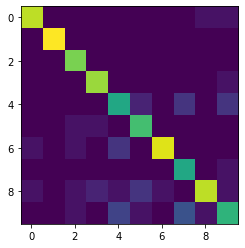

In [427]:
plt.imshow(confusion_mat)
plt.imsave("Confusion-Gauss.jpg",confusion_mat,cmap="gray")